## Acknowledgements

- https://www.kaggle.com/piantic/starter-optiver-quick-eda-automl-wip

## Setting up

In [3]:
# Imports
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import warnings

from pylab import rcParams
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.special import boxcox1p
from pprint import pprint

import cufflinks as cf
import plotly.offline

# Add base dir path to sys.path so that I can do local exports
sys.path.append("../..")
import utils

In [5]:
# Global settings

# Initialise logger
LOGGER = utils.get_logger("house-prices")

# To ignore warnings
warnings.filterwarnings("ignore")

#Limiting float output to 4 decimal points
pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))

# Default figure size in inches
rcParams['figure.figsize'] = 12,6

# Print on each line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Turn ON offline mode for plotly cufflinks iplots
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [16]:
# Configuration
class Config:
    time_id_scale = 1e11 # should be sufficient # Remove since it is not sequential

## Load data and preprocess

#### Book and Trade

In [60]:
book = pd.read_parquet("data/book_train.parquet/stock_id=0")
trades = pd.read_parquet("data/trade_train.parquet/stock_id=0")

In [61]:
book.head(399)
trades.head()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,5,0,1.0014,1.0023,1.0014,1.0024,3,226,2,100
1,5,1,1.0014,1.0023,1.0014,1.0024,3,100,2,100
2,5,5,1.0014,1.0023,1.0014,1.0024,3,100,2,100
3,5,6,1.0014,1.0023,1.0014,1.0024,3,126,2,100
4,5,7,1.0014,1.0023,1.0014,1.0024,3,126,2,100
...,...,...,...,...,...,...,...,...,...,...
394,11,342,1.0001,1.0004,1.0000,1.0005,19,27,201,200
395,11,344,1.0001,1.0004,1.0000,1.0005,18,24,201,301
396,11,345,1.0001,1.0004,1.0000,1.0005,18,24,301,201
397,11,346,1.0001,1.0004,1.0000,1.0005,18,24,301,1


,time_id,seconds_in_bucket,price,size,order_count
0,5,21,1.0023,326,12
1,5,46,1.0028,128,4
2,5,50,1.0028,55,1
3,5,57,1.0032,121,5
4,5,68,1.0036,4,1


In [62]:
# Get a single timestamp value
book["time"] = (book["time_id"] * Config.time_id_scale + book["seconds_in_bucket"]).astype("int64")
trades["time"] = (trades["time_id"] * Config.time_id_scale + trades["seconds_in_bucket"]).astype("int64")

In [63]:
book.set_index("time", inplace=True)
trades.set_index("time", inplace=True)

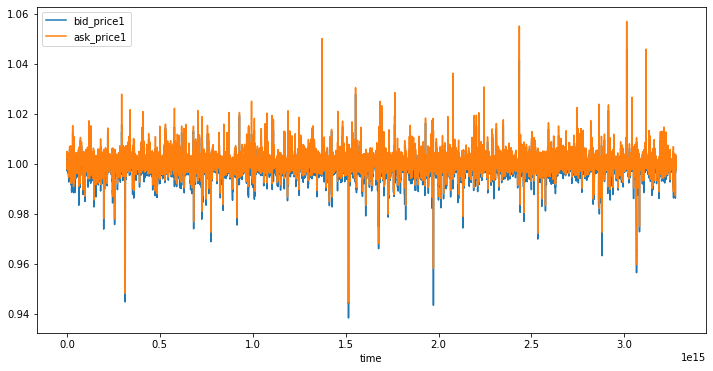

In [64]:
ax = book.plot(y=["bid_price1", "ask_price1"])
# trades.plot(y=["size"], ax=ax)

In [ ]:
# TODO: Check NaNs